In [1]:
import pandas as pd
# pandas used for data manipulation, extraction, filtering etc 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# seaborn for user friendly visualisation

In [2]:
import os 

In [3]:
files = os.listdir(r"C:\Users\12alr\Documents\Coding\Datasets\Uber")[-7:]
# will return parts available within directory
# r refers to raw string which tells python that this is an exact part 

In [4]:
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
# have to create a dataframe of the type of file you have in this case csv
path = r"C:\Users\12alr\Documents\Coding\Datasets\Uber"
# we want to append after the path using /. We have to then read the file 
# by concatenating and using an encoding technique
# Encoding is the process of converting the data or a given sequence of characters, symbols, alphabets etc.
# into a specified format, for the secured transmission of data.
# utf-8 most used 
# we have to concatenate each of the data frames from the iteration
# final is a blank dataframe. We are going to append final by df 
# this is an approach to collecting all the data 
final = pd.DataFrame()
for i in files:
    df = pd.read_csv(path + "/" + i, encoding = "utf-8")
    final = pd.concat([final, df])

In [ ]:
# to check dimensions of dataframe that we have created
final.shape

In [6]:
# here we are making a copy of the data 
# The head() function is used to get the first n rows.
# This function returns the first n rows for the object based on position. It is useful
# for quickly testing if your object has the right type of data in it.
df = final.copy()
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
df.dtypes
# provides the data type of the data 

In [7]:
# as we can see from above, we still have objects 
# we know that date/time needs to be in a timestamp format 
# we then provide it with a format and update our date/time as seen on LHS of eq
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format = "%m/%d/%Y %H:%M:%S")

In [ ]:
df.dtypes

In [ ]:
df.head()

In [8]:
# we want to grab the derived attributes from Date/Time
# this is so we can perform the appropriate analysis
df["Weekday"] = df["Date/Time"].dt.day_name()
df["Day"] = df["Date/Time"].dt.day
df["Minute"] = df["Date/Time"].dt.minute
df["Month"] = df["Date/Time"].dt.month
df["Hour"] = df["Date/Time"].dt.hour
df.head()

,Date/Time,Lat,Lon,Base,Weekday,Day,Minute,Month,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [ ]:
df.dtypes

Analysis of journey by weekdays

In [10]:
df["Weekday"].value_counts().index
df["Weekday"].value_counts()
# with respect to each day we have some value assigned to it 
# we need the index of these values which can paste into the x axis
# the counts for the y axis

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: Weekday, dtype: int64

In [9]:
# we now want to plot this data using plotly
# plotly is an advanced level visualisation library 
import plotly.express as px

In [ ]:
px.bar(x = df["Weekday"].value_counts().index, y = df["Weekday"].value_counts())
# plotting a bar chart 

Analysis of journey by hour

In [ ]:
plt.hist(df["Hour"])
# histogram of hour data. Data peaks in evening time when people are logging off their work 

In [ ]:
# to exactly return each and every month 
df["Month"].unique()

In [ ]:
# to return an exact index we can use enumerate
for i, month in enumerate(df["Month"].unique()):
    print(i)
    print(month)

In [ ]:
plt.figure(figsize=(40,20))
# we need a matrix of 3,2 as we have 6 months
for i, month in enumerate(df["Month"].unique()):
    plt.subplot(3, 2, i + 1)
    # we have a filter for our months 
    df[df["Month"]==month]["Hour"].hist()
# as we can see from almost every month we have our peak times in our evening hours 

Analysis of which month has the maximum rides

In [ ]:
df.head()

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# all the modules which will allow us to create visualisations 

In [ ]:
# now we need to group data on monthly basis
df.groupby("Month")["Hour"].count()

In [ ]:
trace1 = go.Bar(
    x = df.groupby("Month")["Hour"].count().index,
    y = df.groupby("Month")["Hour"].count(),
    name = "Priority"
)
# here we have created a bar chart 

In [ ]:
iplot([trace1])
# we use iplot to execute the graphic 
# September in this case has the highest rush/ maximum rides

Analysis of daily journeys

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(df["Day"],bins = 30, rwidth = 0.8, range = (0.5, 30.5))
# there are other custom parameters I can mess about with other than bins for histogram
# rwidth provides a gap between each bar, bins is are the bars/intervals
plt.xlabel("Date of the month")
plt.ylabel("Total journeys")
plt.title("Journeys by day")
# you would think that on the 30th we have the max amount of rides
# this isn't correct so let's use a distribution plot

In [ ]:
sns.distplot(df["Day"])
# this conveys that our previous graph seemed to be incorrect and so if we introduce a range as we did
# in the previous code then we can see a much more similar looking graph 
# we still have the max rides on the 30th but there is a very different general trend 

Analysis of total rides month-wise

In [ ]:
plt.figure(figsize = (20, 8))

for i, month in enumerate(df["Month"].unique(),1):
    plt.subplot(3,2,i)
    df_out = df[df["Month"]==month]
    plt.hist(df_out["Day"])
    plt.xlabel("Days in month {}".format(month))
    plt.ylabel("Total rides")
# .unique means you just need the unique values 
# our index will start from one 
# we have a filter as df_out 
# we want to iterate in the values same as before 
# then we have all the plotting parameters with a figure plotted

Analysing rush in hour

In [ ]:
ax = sns.pointplot(x = "Hour", y = "Lat", data = df, hue = "Weekday")
ax.set_title("Hours of day vs Latitude of passengers")
# in a pointplot it is similar to a lineplot but it notifies a particular point 
# hue represents which column in the data frame you want to use for color encoding

Analysis of base number popularity per month

In [ ]:
base = df.groupby(["Base", "Month"])["Date/Time"].count().reset_index() 
print(base)   

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = "Month", y = "Date/Time", hue = "Base", data = base)
# here we are splitting the line plot on the basis of base

Cross analysis using heatmap

In [ ]:
def count_rows(x):
    return len(x)

# simple function to return the row count

In [ ]:
# we have to group our data on basis of weekday and hour 
by_cross = df.groupby(["Weekday", "Hour"]).apply(count_rows)
by_cross

In [ ]:
pivot = by_cross.unstack()
pivot
# this will convert the data into a pivot table
# the weekdays have become indexes and the hours have become columns
# it is hard to analyse this data to find the most frequency and so we can visualise this with a heat map

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(pivot)
# this heatmap will convey the data trends much more easily

In [ ]:
# whenever we have to perform a task over and over again the best thing is to create a function 
def heatmap(col1, col2):
    by_cross = df.groupby([col1, col2]).apply(count_rows)
    pivot = by_cross.unstack()
    plt.figure(figsize = (10, 6))
    return sns.heatmap(pivot)
    

In [ ]:
heatmap("Day", "Hour")

Analysis of location data points

In [ ]:
df.head()

In [ ]:
# plt.figure(figsize = (12, 6))
# plt.plot(df["Lon"], df["Lat"],"r+", ms = 0.5)
# plt.xlim(-74.2, -73.7)
# plt.ylim(40.6, 41)
# r+ refers to the datapoints in red colour
# ms means markersize
# where we have a darker colour we have higher density/rush 
# this isn't really deep analysis though so we should use some spatial analysis 

In [ ]:
df_out = df[df["Weekday"]=="Sunday"]
df_out.shape

In [ ]:
df_out.head()

In [ ]:
# we now have to group our data on the basis of lat and lon 
# reset_index resets the index of the DataFrame, and uses the default one instead  
rush = df_out.groupby(["Lat", "Lon"])["Weekday"].count().reset_index()
rush.columns = ["Lat", "Lon", "No of trips"]
rush

In [ ]:
# to perform spatial analysis we need to import further modules 
from folium.plugins import HeatMap

In [ ]:
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
HeatMap(rush, zoom = 20, radius = 15).add_to(basemap)
basemap

Auomating the analysis

In [ ]:
def plot(df, day):
    basemap = folium.Map()
    df_out = df[df["Weekday"]==day]
    HeatMap(df_out.groupby(["Lat", "Lon"])["Weekday"].count().reset_index(), zoom = 20, radius = 15).add_to(basemap)
    return basemap

In [ ]:
plot(df, "Saturday")

Data preparation on jan/june 

In [12]:
uber_15 = pd.read_csv(r"C:\Users\12alr\Documents\Coding\Datasets\Uber/uber-raw-data-janjune-15.csv")

In [13]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [14]:
uber_15.dtypes
# from below we can see that our pickup date is an object data type but we know it supports a timestamp format

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [15]:
uber_15["Pickup_date"] = pd.to_datetime(uber_15["Pickup_date"], format = "%Y-%m-%d %H:%M:%S")

In [16]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [17]:
uber_15["Weekday"] = uber_15["Pickup_date"].dt.day_name()
uber_15["Day"] = uber_15["Pickup_date"].dt.day
uber_15["Minute"] = uber_15["Pickup_date"].dt.minute
uber_15["Month"] = uber_15["Pickup_date"].dt.month
uber_15["Hour"] = uber_15["Pickup_date"].dt.hour
# here we are extracting the derived features from the dataset 

In [ ]:
uber_15.head()

Uber pikcups by month in NYC

In [ ]:
px.bar(x = uber_15["Month"].value_counts().index,
        y = uber_15["Month"].value_counts())
# plotly bar chart used in this case 


Analysing rush in NYC

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(uber_15["Hour"])

In depth analysis of rush in NYC day and hour wise

In [18]:
summary = uber_15.groupby(["Weekday", "Hour"])["Pickup_date"].count().reset_index()
summary.head()

,Weekday,Hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


In [19]:
summary.columns = ["Weekday", "Hour", "Counts"]
summary.head()

,Weekday,Hour,Counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


<AxesSubplot:xlabel='Hour', ylabel='Counts'>

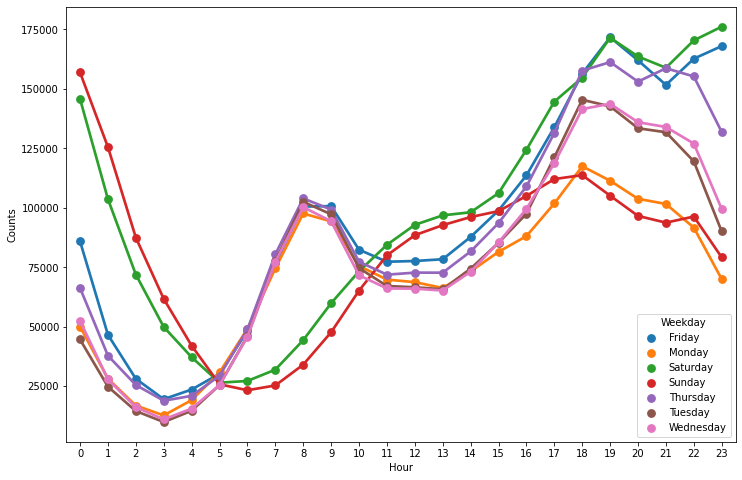

In [20]:
plt.figure(figsize = (12, 8))
sns.pointplot(x = "Hour", y = "Counts", hue = "Weekday", data = summary)

Analysing which base number has the most active vehicles

In [21]:
uber_foil = pd.read_csv(r"C:\Users\12alr\Documents\Coding\Datasets\Uber/Uber-Jan-Feb-FOIL.csv")
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [22]:
uber_foil.shape

(354, 4)

In [23]:
uber_foil["dispatching_base_number"].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

<AxesSubplot:xlabel='dispatching_base_number', ylabel='active_vehicles'>

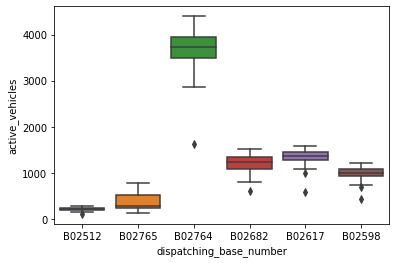

In [24]:
# whenever we have multiple base numbers we usually go with box plots
sns.boxplot(x = "dispatching_base_number", y = "active_vehicles", data = uber_foil)

Analysing which base number has the the most trips 

<AxesSubplot:xlabel='dispatching_base_number', ylabel='trips'>

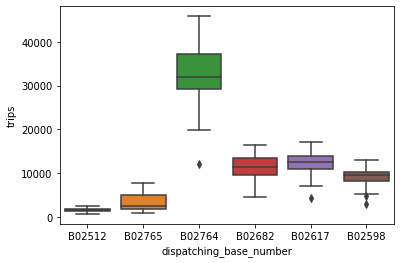

In [26]:
sns.boxplot(x = "dispatching_base_number", y = "trips", data = uber_foil)

How average trips per vehicle increase/decrease with dates with each of the base numbers

In [28]:
# first we have to extract the trips per vehicle which we do not currently have 
uber_foil["trips/vehicle"] = uber_foil["trips"]/uber_foil["active_vehicles"]

In [29]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


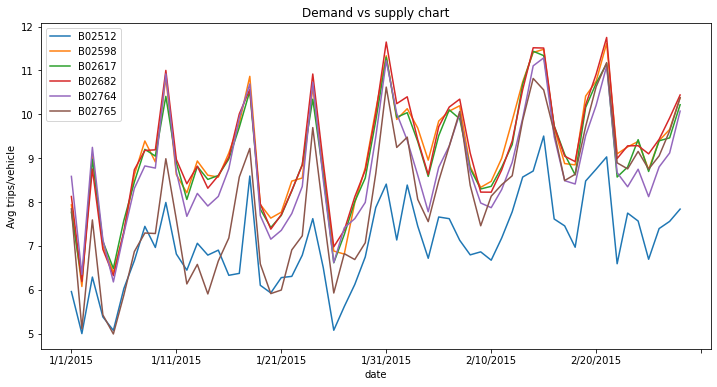

In [33]:
# we have to create our date as our index and group our data on basis of base number 
plt.figure(figsize= (12, 6))
uber_foil.set_index("date").groupby(["dispatching_base_number"])["trips/vehicle"].plot()
plt.ylabel("Avg trips/vehicle")
plt.title("Demand vs supply chart")
plt.legend()